# Write and document a new recipe for Plots.jl

Hi! Today I'll be writing a new reciple for `Plots.jl` on the `Flux.jl` package. Below is an example of a machine learning model I created to classify images. I will have a loss function for my model representing how incorrect the model is. As we keep training the data, we can use the `Flux.throttle` to update the loss by pushing it to an array. This is what I'll be doing. The array will be called `trainloss` and it will be updated every second.

In [19]:
using Flux, Images, CSV, Statistics, Printf
data = CSV.File("photos.csv"; header=false)
preprocess(img) = vec(Float64.(Gray.(load("images/$(img[2])"))))
function create_batch(r)
    xs = [preprocess(img) for img in data[r]]
    ys = [Flux.onehot(img[6]+1, 1:30) for img in data[r]]
    return (Flux.batch(xs), Flux.batch(ys))
end
trainbatch = create_batch(1:4000)
model = Chain(Dense(50176, 512, relu), Dense(512, 64), Dense(64, 30, identity), softmax)
loss(x,y) = Flux.crossentropy(model(x), y)
opt = ADAM(0.0001)
trainloss = []
update_loss!() = push!(trainloss, loss(trainbatch...))

update_loss! (generic function with 1 method)

In [20]:
Flux.train!(loss, params(model), Iterators.repeated(trainbatch, 50), opt; cb = Flux.throttle(update_loss!, 1))

Now that the model is done being trained (for now), we can look at the `trainloss` array to see our values.

In [21]:
trainloss

17-element Array{Any,1}:
 16.496405f0 
  8.812055f0 
  7.624277f0 
  5.8139915f0
  4.468988f0 
  4.1044044f0
  3.64901f0  
  3.5187101f0
  3.389844f0 
  3.3675592f0
  3.3153782f0
  3.2983918f0
  3.2858765f0
  3.279671f0 
  3.2652335f0
  3.2542253f0
  3.245323f0 

We can create a recipe to help optimise the code. Many packages have custom types and custom data. There is usually specialized structure, and useful methods of visualizing that structure and data. Having a recipe solves the difficult problem of how to build generic visualizations of user-defined data types, without adding bulky dependencies on complex graphics packages. Check [this](http://docs.juliaplots.org/latest/recipes/) out to learn more about it.

In [22]:
using RecipesBase

#the user-defined data type
struct myrecipe end

@recipe function plot(::myrecipe, loss::Array; customlabel="loss")
    
    #setting the following attributes if they are unset
    markershape --> :c
    markercolor --> :red
    xrotation   --> -10
    yrotation   --> -10
    smooth --> false
    xlabel --> "seconds of training"
    ylabel --> "loss"
    
    #forcing the label attribute to be the customlabel
    label := customlabel
    
    #x-axis
    1:length(loss)
    
    #y-axis
    loss
end

Now, we can plot the data and specify the recipe!

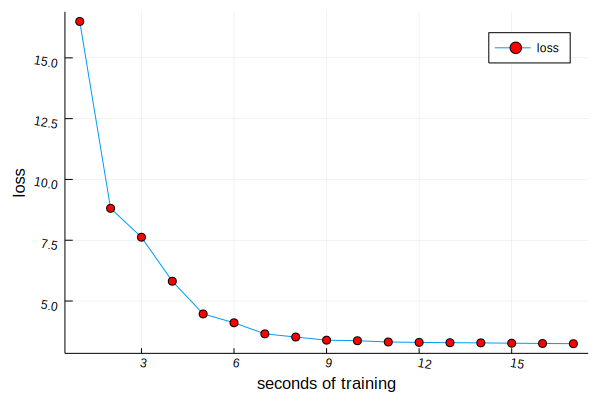

In [23]:
using Plots
plot(myrecipe(), trainloss)

### Possible Improvements

In general, I think that the documentation for `Plots.jl` is very good. I first looked at the [recipes page](http://docs.juliaplots.org/latest/recipes/) from http://docs.juliaplots.org/ followed by [RecipesBase](https://github.com/JuliaPlots/RecipesBase.jl). I must say that this isn't my first time using `Plots.jl`, therefore I already knew the basics such as plotting a line graph. However, I do believe that the `RecpiesBase.jl` could benefit from having an actual documentation teaching people. This can be made using `Documenter.jl` which can generate docs automatically. The biggest problem here is that the `README.md` is the only place with information about this and is lacking in depth. It took me quite a while to figure it out, all through trial and error, and I must say that it was slightly confusing. As for `Plots.jl` in general, I believe that there isn't much room for improvement because there's such a wide range of resources on it: cheatsheets, JuliaAcademy tutorials, docs, YouTube videos, and more.